In [177]:
import pandas as pd
import numpy as np
import os
from tqdm import tnrange,tqdm_notebook
import seaborn as sns
import matplotlib.pyplot as plt
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn
os.chdir("C:\\workspace\\DACON_3\\Auction_master_kr")
AM_train = pd.read_csv("Auction_master_train.csv")
AM_test = pd.read_csv("Auction_master_test.csv")
#AM_train = pd.concat([AM_train, AM_test], axis = 0)
print(AM_train.shape)
# del AM_train["point.x"]
# del AM_train["point.y"]
# del AM_train['Appraisal_company']
# del AM_train["Final_result"]
# del AM_train["Creditor"]
# del AM_train["addr_si"]
# del AM_train["addr_dong"]
# del AM_train["addr_li"]
# del AM_train["addr_san"]
# del AM_train["addr_bunji1"]
# del AM_train["addr_bunji2"]
# del AM_train["addr_etc"]
# del AM_train["Specific"]
# del AM_train["road_name"]
# del AM_train["road_bunji1"]
# del AM_train["road_bunji2"]
# del AM_train["Close_result"]
# del AM_train["Share_auction_YorN"]
import datetime

def change_datetime(x):
    today = datetime.date.today()
    someday = datetime.date(int(x[:4]), int(x[5:7]), int(x[8:10]))
    diff = today - someday
    return diff.days
AM_train["Appraisal_date"] = AM_train["Appraisal_date"].apply(lambda x : x[:10])
AM_train["First_auction_date"] = AM_train["First_auction_date"].apply(lambda x : x[:10])
AM_train["Final_auction_date"] = AM_train["Final_auction_date"].apply(lambda x : x[:10])
AM_train["Preserve_regist_date"] = AM_train["Preserve_regist_date"].apply(lambda x : x[:10])
AM_train["Close_date"] = AM_train["Close_date"].apply(lambda x : x[:10])
AM_train["Appraisal_date"] = AM_train["Appraisal_date"].apply(change_datetime)
AM_train["First_auction_date"] = AM_train["First_auction_date"].apply(change_datetime)
AM_train["Final_auction_date"] = AM_train["Final_auction_date"].apply(change_datetime)
AM_train["Preserve_regist_date"] = AM_train["Preserve_regist_date"].apply(change_datetime)
AM_train["Close_date"] = AM_train["Close_date"].apply(change_datetime)
AM_train["Diff_price"] = AM_train['Total_appraisal_price'] - AM_train['Minimum_sales_price']
#AM_train["Diff_date"] = AM_train['First_auction_date'] - AM_train['Final_auction_date']
print(AM_train.Auction_class.unique())
AM_train.Auction_class.replace({'임의':0, '강제':1},inplace=True)
print(AM_train.Auction_class.unique())

print(AM_train.addr_do.unique())
AM_train.addr_do.replace({'부산':0, '서울':1},inplace=True)
#print(AM_train.addr_do.unique())

print(AM_train.Apartment_usage.unique())
AM_train.Apartment_usage.replace({'주상복합':0, '아파트':1},inplace=True)
print(AM_train.Apartment_usage.unique())
AM_train1 = AM_train[AM_train.addr_do == 0]
AM_train2 = AM_train[AM_train.addr_do == 1]
#del AM_train1['addr_do']
#del AM_train2['addr_do']
#AM_train.index = np.arange(len(AM_train))

(1933, 41)
['임의' '강제']
[0 1]
['부산' '서울']
['주상복합' '아파트']
[0 1]


In [178]:
#AM_train.index = AM_train.Auction_key
AM_train.drop(index=[1521], axis = 0, inplace=True)
AM_train.drop(index=[1212], axis = 0, inplace=True)
#AM_train.drop(index=[1515], axis = 0, inplace=True)
#AM_train.drop(index=[1327], axis = 0, inplace=True)
#AM_train.drop(index=[391], axis = 0, inplace=True)

In [179]:
AM_train[AM_train.Total_appraisal_price == AM_train.Total_appraisal_price.max()]

,Auction_key,Auction_class,Bid_class,Claim_price,Appraisal_company,Appraisal_date,Auction_count,Auction_miscarriage_count,Total_land_gross_area,Total_land_real_area,...,Share_auction_YorN,road_name,road_bunji1,road_bunji2,Close_date,Close_result,point.y,point.x,Hammer_price,Diff_price
1515,110,1,일괄,1100000000,건감정,1078,2,1,67392.2,44.46,...,N,언주로30길,56.0,NaN,776,배당,37.488082,127.054315,4863000000,1114000000


In [180]:
len(AM_train.columns.tolist())

42

In [181]:
# sel_name1 = AM_train.columns.tolist()[1 : 5]
# sel_name1.append('addr_do')
# sel_name2 = AM_train.columns.tolist()[5 : 9]
# sel_name2.append('addr_do')
# sel_name3 = AM_train.columns.tolist()[9 : 13]
# sel_name3.append('addr_do')
# sel_name4 = AM_train.columns.tolist()[13 : 17]
# sel_name4.append('addr_do')
# sel_name5 = AM_train.columns.tolist()[17 : 21]
# sel_name5.append('addr_do')
# sel_name6 = AM_train.columns.tolist()[21 : ]
# sel_name6.append('addr_do')

In [182]:
AM_train.columns
selected_features = AM_train.columns.tolist()
selected_features.remove('Auction_key')

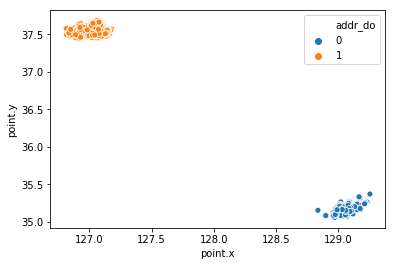

In [183]:
sns.scatterplot(x="point.x", y="point.y", hue = "addr_do", data = AM_train)

In [184]:
from sklearn.cluster import KMeans
point = AM_train[["point.x", "point.y"]]
X = point.values
kmeans = KMeans(n_clusters=2, random_state=0).fit(X)
kmeans.labels_

array([0, 0, 0, ..., 1, 1, 1])

In [185]:
point['label'] = kmeans.labels_
point['addr_do'] = AM_train.addr_do

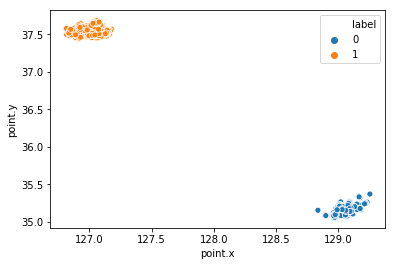

In [186]:
sns.scatterplot(x="point.x", y="point.y", hue = "label", data = point)

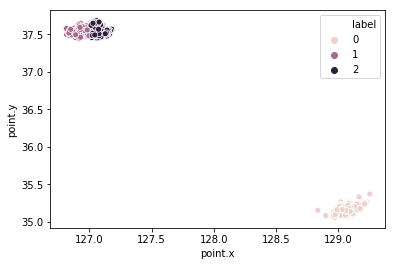

In [187]:
from sklearn.cluster import KMeans
point = AM_train[["point.x", "point.y"]]
X = point.values
kmeans = KMeans(n_clusters=3, random_state=0).fit(X)
kmeans.labels_
point['label'] = kmeans.labels_
point['addr_do'] = AM_train.addr_do
sns.scatterplot(x="point.x", y="point.y", hue = "label", data = point)

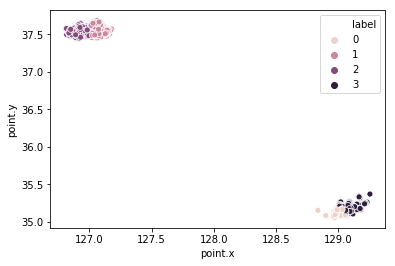

In [188]:
from sklearn.cluster import KMeans
point = AM_train[["point.x", "point.y"]]
X = point.values
kmeans = KMeans(n_clusters=4, random_state=0).fit(X)
kmeans.labels_
point['label'] = kmeans.labels_
point['addr_do'] = AM_train.addr_do
sns.scatterplot(x="point.x", y="point.y", hue = "label", data = point)

In [189]:
AM_train['4class'] = kmeans.labels_

# Label Distribution - with Class

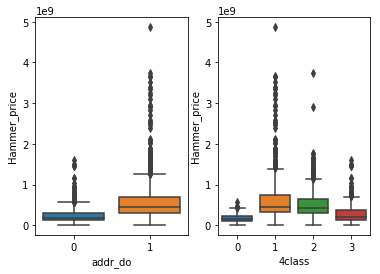

In [190]:
fig, axs = plt.subplots(ncols=2)
sns.boxplot(y = 'Hammer_price', x = 'addr_do', data = AM_train, ax=axs[0])
sns.boxplot(y = 'Hammer_price', x = '4class', data = AM_train, ax=axs[1])

In [191]:
AM_train.addr_do.value_counts()

1    1240
0     691
Name: addr_do, dtype: int64

In [192]:
AM_train.groupby('addr_do')['Hammer_price'].mean()

addr_do
0    2.436941e+08
1    5.858431e+08
Name: Hammer_price, dtype: float64

In [193]:
AM_train.groupby('4class')['Hammer_price'].mean()

4class
0    1.824347e+08
1    6.411451e+08
2    5.184715e+08
3    2.811066e+08
Name: Hammer_price, dtype: float64

# Feature Distribution - with LABEL and Class

# 1. Auction_class : 
- 전체
- 서울, 부산
- 4class

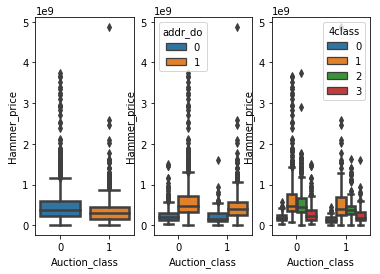

In [194]:
fig, axs = plt.subplots(ncols=3)
sns.boxplot(x='Auction_class', y='Hammer_price',data=AM_train, linewidth=2.5, ax=axs[0])
sns.boxplot(x='Auction_class', y='Hammer_price',hue = 'addr_do',data=AM_train, linewidth=2.5, ax=axs[1])
sns.boxplot(x='Auction_class', y='Hammer_price',hue = '4class',data=AM_train, linewidth=2.5, ax=axs[2])

# 1-1. Share_auction_YorN :
- 전체
- 서울, 부산
- 4class

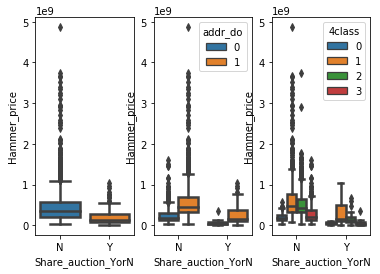

In [195]:
fig, axs = plt.subplots(ncols=3)
sns.boxplot(x='Share_auction_YorN', y='Hammer_price',data=AM_train, linewidth=2.5, ax=axs[0])
sns.boxplot(x='Share_auction_YorN', y='Hammer_price',hue = 'addr_do',data=AM_train, linewidth=2.5, ax=axs[1])
sns.boxplot(x='Share_auction_YorN', y='Hammer_price',hue = '4class',data=AM_train, linewidth=2.5, ax=axs[2])

# 2. Price : Total_appraisal_price, Minimum_sales_price, Diff_price
## 1. class
- 전체
- 서울, 부산
- 4class
## 2. label

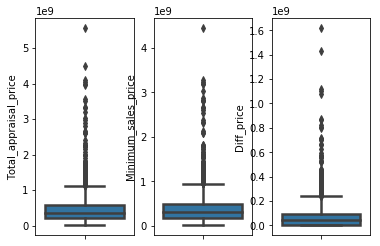

In [196]:
fig, axs = plt.subplots(ncols=3)
#sns.boxplot(x='addr_do', y='Hammer_price',data=AM_train, linewidth=2.5, ax=axs[0])
sns.boxplot(y='Total_appraisal_price',data=AM_train, linewidth=2.5, ax=axs[0])
sns.boxplot(y='Minimum_sales_price',data=AM_train, linewidth=2.5, ax=axs[1])
sns.boxplot(y='Diff_price',data=AM_train, linewidth=2.5, ax=axs[2])

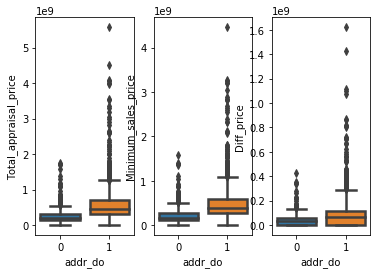

In [197]:
fig, axs = plt.subplots(ncols=3)
#sns.boxplot(x='addr_do', y='Hammer_price',data=AM_train, linewidth=2.5, ax=axs[0])
sns.boxplot(y='Total_appraisal_price',x = 'addr_do' ,data=AM_train, linewidth=2.5, ax=axs[0])
sns.boxplot(y='Minimum_sales_price',x = 'addr_do' ,data=AM_train, linewidth=2.5, ax=axs[1])
sns.boxplot(y='Diff_price',x = 'addr_do' ,data=AM_train, linewidth=2.5, ax=axs[2])

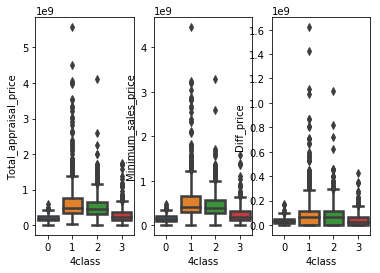

In [198]:
fig, axs = plt.subplots(ncols=3)
#sns.boxplot(x='addr_do', y='Hammer_price',data=AM_train, linewidth=2.5, ax=axs[0])
sns.boxplot(y='Total_appraisal_price',x = '4class' ,data=AM_train, linewidth=2.5, ax=axs[0])
sns.boxplot(y='Minimum_sales_price',x = '4class' ,data=AM_train, linewidth=2.5, ax=axs[1])
sns.boxplot(y='Diff_price',x = '4class' ,data=AM_train, linewidth=2.5, ax=axs[2])

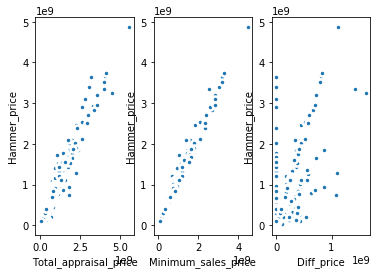

In [199]:
fig, axs = plt.subplots(ncols=3)
#sns.boxplot(x='addr_do', y='Hammer_price',data=AM_train, linewidth=2.5, ax=axs[0])
sns.scatterplot(x='Total_appraisal_price',y = 'Hammer_price' ,data=AM_train, linewidth=2.5, ax=axs[0])
sns.scatterplot(x='Minimum_sales_price',y = 'Hammer_price' ,data=AM_train, linewidth=2.5, ax=axs[1])
sns.scatterplot(x='Diff_price',y = 'Hammer_price' ,data=AM_train, linewidth=2.5, ax=axs[2])

In [200]:
price = ['Total_appraisal_price', 'Minimum_sales_price', 'Diff_price', 'Hammer_price'] #'Hammer_price'
AM_train[price].corr()

,Total_appraisal_price,Minimum_sales_price,Diff_price,Hammer_price
Total_appraisal_price,1.000000,0.978487,0.742515,0.979509
Minimum_sales_price,0.978487,1.000000,0.588352,0.992130
Diff_price,0.742515,0.588352,1.000000,0.617909
Hammer_price,0.979509,0.992130,0.617909,1.000000


# 3. AREA : Total_land_gross_area, Total_land_real_area, Total_land_auction_area, Total_building_area, Total_building_auction_area

## 1. class
- 전체
- 서울, 부산
- 4class
## 2. label

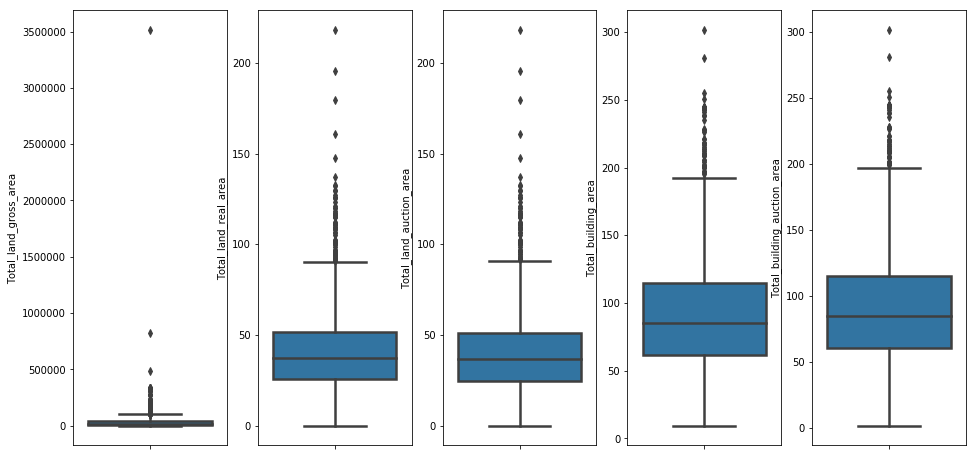

In [201]:
fig, axs = plt.subplots(ncols=5, figsize=(16, 8))
#sns.boxplot(x='addr_do', y='Hammer_price',data=AM_train, linewidth=2.5, ax=axs[0])
sns.boxplot(y='Total_land_gross_area',data=AM_train, linewidth=2.5, ax=axs[0])
sns.boxplot(y='Total_land_real_area',data=AM_train, linewidth=2.5, ax=axs[1])
sns.boxplot(y='Total_land_auction_area',data=AM_train, linewidth=2.5, ax=axs[2])
sns.boxplot(y='Total_building_area',data=AM_train, linewidth=2.5, ax=axs[3])
sns.boxplot(y='Total_building_auction_area',data=AM_train, linewidth=2.5, ax=axs[4])

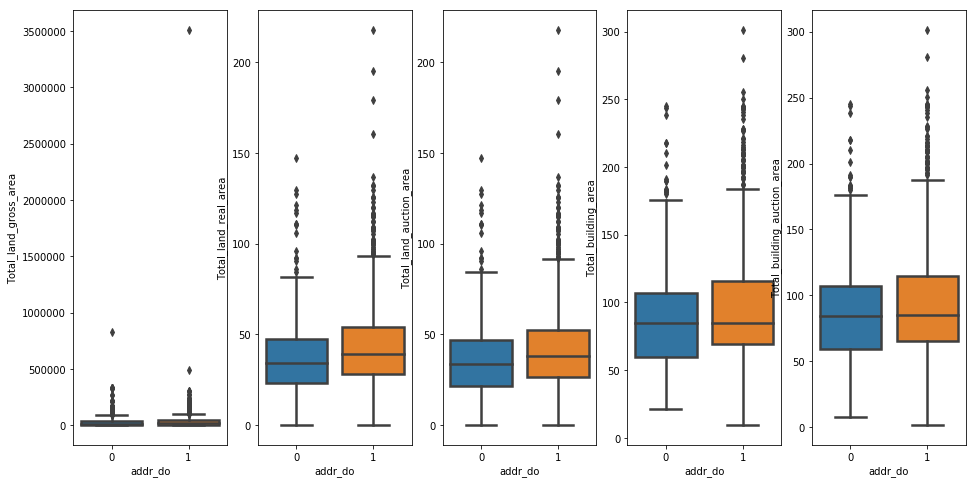

In [202]:
fig, axs = plt.subplots(ncols=5, figsize=(16, 8))
sns.boxplot(x='addr_do', y='Total_land_gross_area',data=AM_train, linewidth=2.5, ax=axs[0])
sns.boxplot(x='addr_do', y='Total_land_real_area',data=AM_train, linewidth=2.5, ax=axs[1])
sns.boxplot(x='addr_do', y='Total_land_auction_area',data=AM_train, linewidth=2.5, ax=axs[2])
sns.boxplot(x='addr_do', y='Total_building_area',data=AM_train, linewidth=2.5, ax=axs[3])
sns.boxplot(x='addr_do', y='Total_building_auction_area',data=AM_train, linewidth=2.5, ax=axs[4])

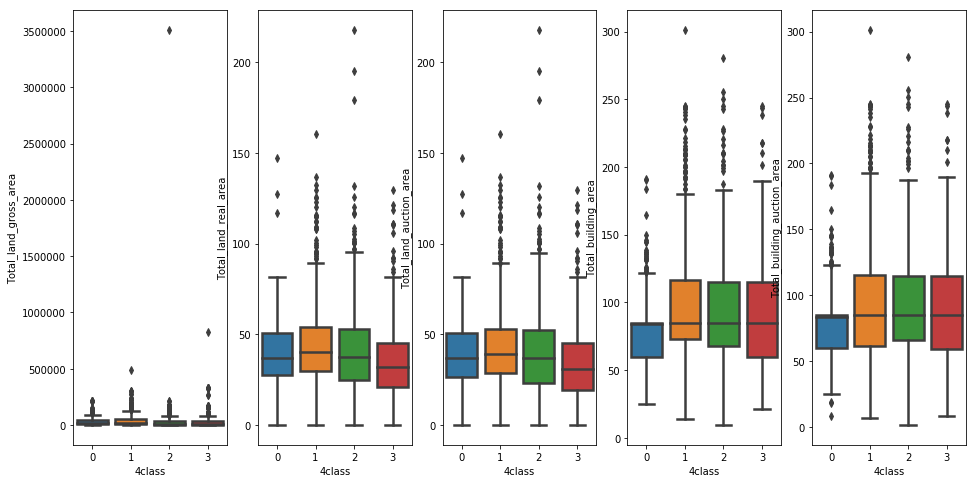

In [203]:
fig, axs = plt.subplots(ncols=5, figsize=(16, 8))
sns.boxplot(x='4class', y='Total_land_gross_area',data=AM_train, linewidth=2.5, ax=axs[0])
sns.boxplot(x='4class', y='Total_land_real_area',data=AM_train, linewidth=2.5, ax=axs[1])
sns.boxplot(x='4class', y='Total_land_auction_area',data=AM_train, linewidth=2.5, ax=axs[2])
sns.boxplot(x='4class', y='Total_building_area',data=AM_train, linewidth=2.5, ax=axs[3])
sns.boxplot(x='4class', y='Total_building_auction_area',data=AM_train, linewidth=2.5, ax=axs[4])

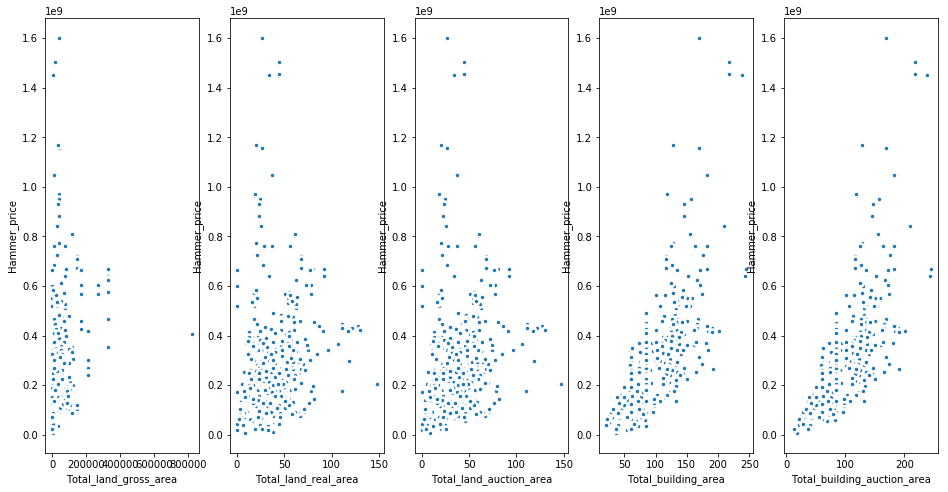

In [204]:
fig, axs = plt.subplots(ncols=5, figsize=(16, 8))
sns.scatterplot(x='Total_land_gross_area',y = 'Hammer_price' ,data=AM_train[AM_train.addr_do == 0], linewidth=2.5, ax=axs[0])
sns.scatterplot(x='Total_land_real_area',y = 'Hammer_price',data=AM_train[AM_train.addr_do == 0], linewidth=2.5, ax=axs[1])
sns.scatterplot(x='Total_land_auction_area',y = 'Hammer_price',data=AM_train[AM_train.addr_do == 0], linewidth=2.5, ax=axs[2])
sns.scatterplot(x='Total_building_area',y = 'Hammer_price',data=AM_train[AM_train.addr_do == 0], linewidth=2.5, ax=axs[3])
sns.scatterplot(x='Total_building_auction_area',y = 'Hammer_price',data=AM_train[AM_train.addr_do == 0], linewidth=2.5, ax=axs[4])

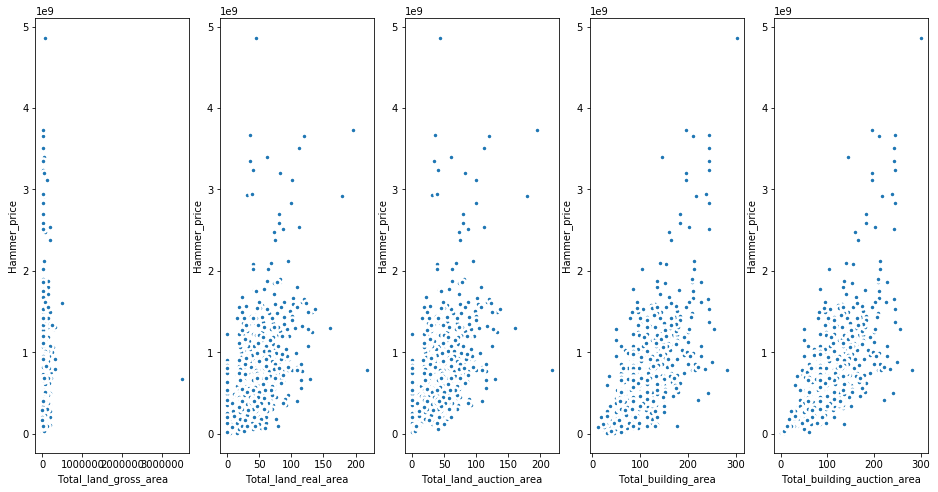

In [205]:
fig, axs = plt.subplots(ncols=5, figsize=(16, 8))
sns.scatterplot(x='Total_land_gross_area',y = 'Hammer_price' ,data=AM_train[AM_train.addr_do == 1], linewidth=2.5, ax=axs[0])
sns.scatterplot(x='Total_land_real_area',y = 'Hammer_price',data=AM_train[AM_train.addr_do == 1], linewidth=2.5, ax=axs[1])
sns.scatterplot(x='Total_land_auction_area',y = 'Hammer_price',data=AM_train[AM_train.addr_do == 1], linewidth=2.5, ax=axs[2])
sns.scatterplot(x='Total_building_area',y = 'Hammer_price',data=AM_train[AM_train.addr_do == 1], linewidth=2.5, ax=axs[3])
sns.scatterplot(x='Total_building_auction_area',y = 'Hammer_price',data=AM_train[AM_train.addr_do == 1], linewidth=2.5, ax=axs[4])

Total_land_gross_area의 선형성이 매우 깨지는 것으로 보임

In [206]:
area_list = ['Total_land_gross_area', 'Total_land_real_area', 'Total_land_auction_area', 'Total_building_area', 'Total_building_auction_area', 'Hammer_price']
AM_train[area_list][AM_train.addr_do == 0].corr()

,Total_land_gross_area,Total_land_real_area,Total_land_auction_area,Total_building_area,Total_building_auction_area,Hammer_price
Total_land_gross_area,1.000000,0.333998,0.340608,0.256773,0.262680,0.296979
Total_land_real_area,0.333998,1.000000,0.982991,0.500317,0.492330,0.235436
Total_land_auction_area,0.340608,0.982991,1.000000,0.503881,0.530017,0.259511
Total_building_area,0.256773,0.500317,0.503881,1.000000,0.978278,0.749722
Total_building_auction_area,0.262680,0.492330,0.530017,0.978278,1.000000,0.757946
Hammer_price,0.296979,0.235436,0.259511,0.749722,0.757946,1.000000


In [207]:
AM_train[area_list][AM_train.addr_do == 1].corr()

,Total_land_gross_area,Total_land_real_area,Total_land_auction_area,Total_building_area,Total_building_auction_area,Hammer_price
Total_land_gross_area,1.000000,0.126647,0.117155,0.018910,0.012645,0.074294
Total_land_real_area,0.126647,1.000000,0.964436,0.602697,0.569055,0.478227
Total_land_auction_area,0.117155,0.964436,1.000000,0.583461,0.627977,0.500915
Total_building_area,0.018910,0.602697,0.583461,1.000000,0.949772,0.688471
Total_building_auction_area,0.012645,0.569055,0.627977,0.949772,1.000000,0.703480
Hammer_price,0.074294,0.478227,0.500915,0.688471,0.703480,1.000000


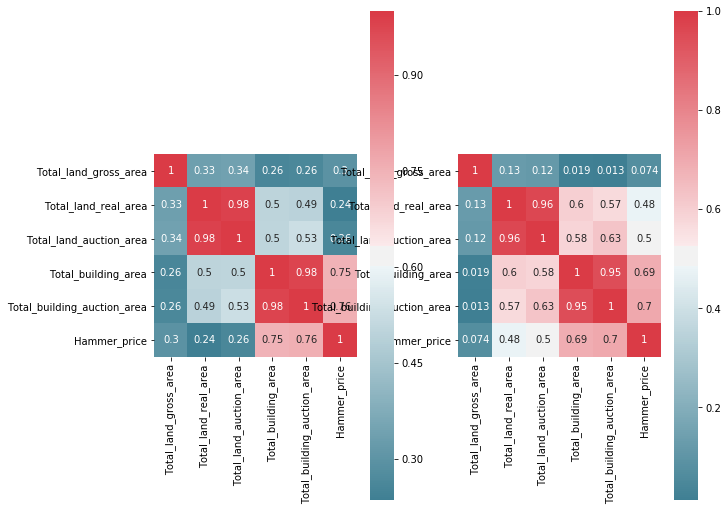

In [208]:
f, ax = plt.subplots(ncols=2, figsize=(10, 9))
sns.heatmap(AM_train[area_list][AM_train.addr_do == 0].corr(), mask=np.zeros_like(AM_train[area_list][AM_train.addr_do == 0].corr(), dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax[0], annot=True)
sns.heatmap(AM_train[area_list][AM_train.addr_do == 1].corr(), mask=np.zeros_like(AM_train[area_list][AM_train.addr_do == 1].corr(), dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax[1], annot=True)

# 파생변수 만든거 분포 보기

In [209]:
AM_train.Total_land_gross_area = AM_train['Total_land_gross_area'] + 0.1
AM_train.Total_land_auction_area = AM_train['Total_land_auction_area'] + 0.1
AM_train.Total_land_real_area = AM_train['Total_land_real_area'] + 0.1

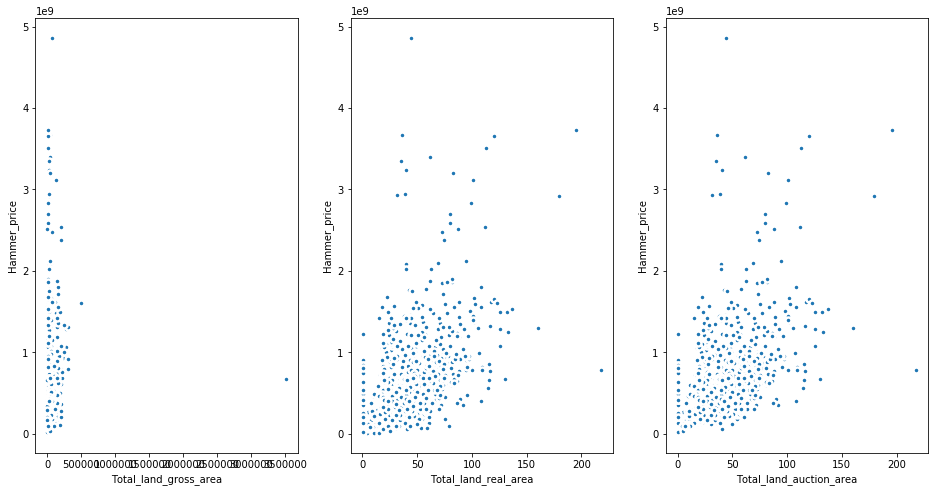

In [210]:
fig, axs = plt.subplots(ncols=3, figsize=(16, 8))
sns.scatterplot(x='Total_land_gross_area',y = 'Hammer_price' ,data=AM_train[AM_train.addr_do == 1], linewidth=2.5, ax=axs[0])
sns.scatterplot(x='Total_land_real_area',y = 'Hammer_price',data=AM_train[AM_train.addr_do == 1], linewidth=2.5, ax=axs[1])
sns.scatterplot(x='Total_land_auction_area',y = 'Hammer_price',data=AM_train[AM_train.addr_do == 1], linewidth=2.5, ax=axs[2])

In [211]:
AM_train['BA_TA'] = AM_train['Total_building_auction_area'] / AM_train['Total_land_auction_area']
AM_train['BTA_TR'] = AM_train['Total_building_area'] / AM_train['Total_land_real_area']

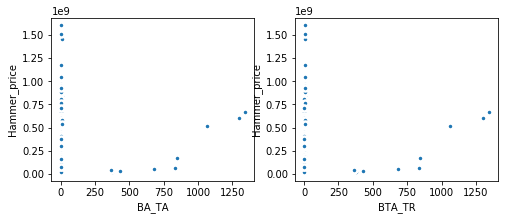

In [212]:
fig, axs = plt.subplots(ncols=2, figsize=(8, 3))
sns.scatterplot(x='BA_TA',y = 'Hammer_price' ,data=AM_train[AM_train.addr_do == 0], linewidth=2.5, ax=axs[0])
sns.scatterplot(x='BTA_TR',y = 'Hammer_price',data=AM_train[AM_train.addr_do == 0], linewidth=2.5, ax=axs[1])

In [213]:
AM_train.loc[AM_train.addr_do == 0][['BA_TA', 'BTA_TR', 'Hammer_price']].corr()

,BA_TA,BTA_TR,Hammer_price
BA_TA,1.000000,1.000000,0.059644
BTA_TR,1.000000,1.000000,0.059603
Hammer_price,0.059644,0.059603,1.000000


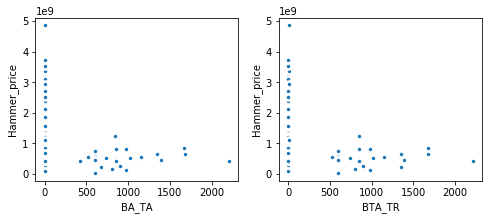

In [214]:
fig, axs = plt.subplots(ncols=2, figsize=(8, 3))
sns.scatterplot(x='BA_TA',y = 'Hammer_price' ,data=AM_train[AM_train.addr_do == 1], linewidth=2.5, ax=axs[0])
sns.scatterplot(x='BTA_TR',y = 'Hammer_price',data=AM_train[AM_train.addr_do == 1], linewidth=2.5, ax=axs[1])

In [215]:
AM_train.loc[AM_train.addr_do == 1][['BA_TA', 'BTA_TR', 'Hammer_price']].corr()

,BA_TA,BTA_TR,Hammer_price
BA_TA,1.000000,0.991760,-0.017749
BTA_TR,0.991760,1.000000,-0.020441
Hammer_price,-0.017749,-0.020441,1.000000


In [216]:
AM_train['land_realOFgross'] = AM_train.Total_land_real_area / AM_train.Total_land_gross_area
AM_train['land_auctionOFgross'] = AM_train.Total_land_auction_area / AM_train.Total_land_gross_area

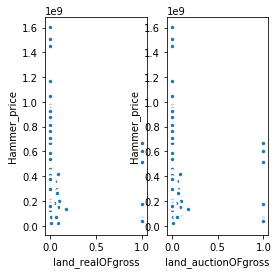

In [217]:
fig, axs = plt.subplots(ncols=2, figsize=(4, 4))
sns.scatterplot(x='land_realOFgross',y = 'Hammer_price' ,data=AM_train[AM_train.addr_do == 0], linewidth=2.5, ax=axs[0])
sns.scatterplot(x='land_auctionOFgross',y = 'Hammer_price',data=AM_train[AM_train.addr_do == 0], linewidth=2.5, ax=axs[1])

In [218]:
AM_train.loc[AM_train.addr_do == 0][['land_realOFgross', 'land_auctionOFgross', 'Hammer_price']].corr()

,land_realOFgross,land_auctionOFgross,Hammer_price
land_realOFgross,1.000000,0.999625,-0.027958
land_auctionOFgross,0.999625,1.000000,-0.025039
Hammer_price,-0.027958,-0.025039,1.000000


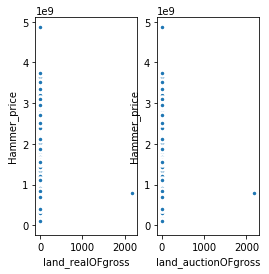

In [219]:
fig, axs = plt.subplots(ncols=2, figsize=(4, 4))
sns.scatterplot(x='land_realOFgross',y = 'Hammer_price' ,data=AM_train[AM_train.addr_do == 1], linewidth=2.5, ax=axs[0])
sns.scatterplot(x='land_auctionOFgross',y = 'Hammer_price',data=AM_train[AM_train.addr_do == 1], linewidth=2.5, ax=axs[1])

In [220]:
AM_train.loc[AM_train.addr_do == 1][['land_realOFgross', 'land_auctionOFgross', 'Hammer_price']].corr()

,land_realOFgross,land_auctionOFgross,Hammer_price
land_realOFgross,1.000000,1.000000,0.011353
land_auctionOFgross,1.000000,1.000000,0.011361
Hammer_price,0.011353,0.011361,1.000000


In [221]:
AM_train['buildingOFland_gross'] = AM_train.Total_building_area / AM_train.Total_land_gross_area
AM_train['building_auctionOFland_gross'] = AM_train.Total_building_auction_area / AM_train.Total_land_gross_area
AM_train['buildingOFreal_land'] = AM_train["Total_building_area"] / AM_train["Total_land_real_area"]
AM_train['auction_buildingOFauction_land'] = AM_train["Total_building_auction_area"] / AM_train["Total_land_auction_area"]

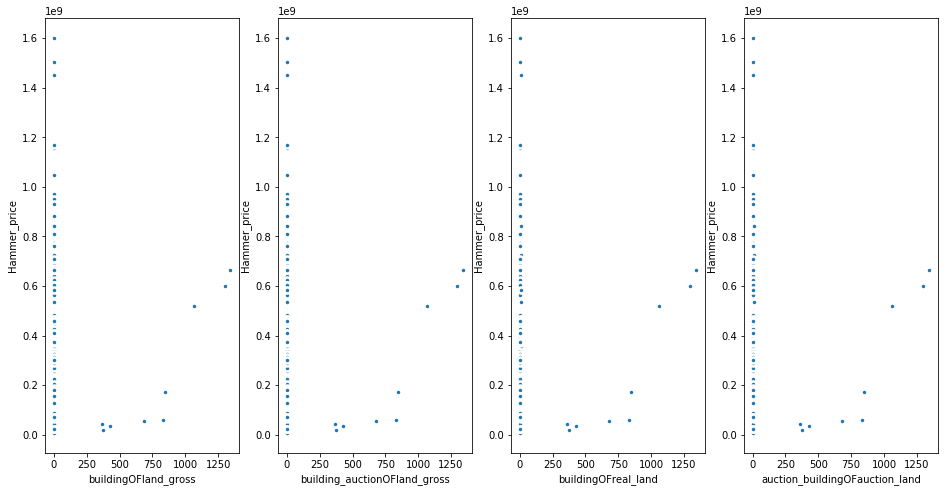

In [222]:
fig, axs = plt.subplots(ncols=4, figsize=(16, 8))
sns.scatterplot(x='buildingOFland_gross',y = 'Hammer_price' ,data=AM_train[AM_train.addr_do == 0], linewidth=2.5, ax=axs[0])
sns.scatterplot(x='building_auctionOFland_gross',y = 'Hammer_price',data=AM_train[AM_train.addr_do == 0], linewidth=2.5, ax=axs[1])
sns.scatterplot(x='buildingOFreal_land',y = 'Hammer_price',data=AM_train[AM_train.addr_do == 0], linewidth=2.5, ax=axs[2])
sns.scatterplot(x='auction_buildingOFauction_land',y = 'Hammer_price',data=AM_train[AM_train.addr_do == 0], linewidth=2.5, ax=axs[3])

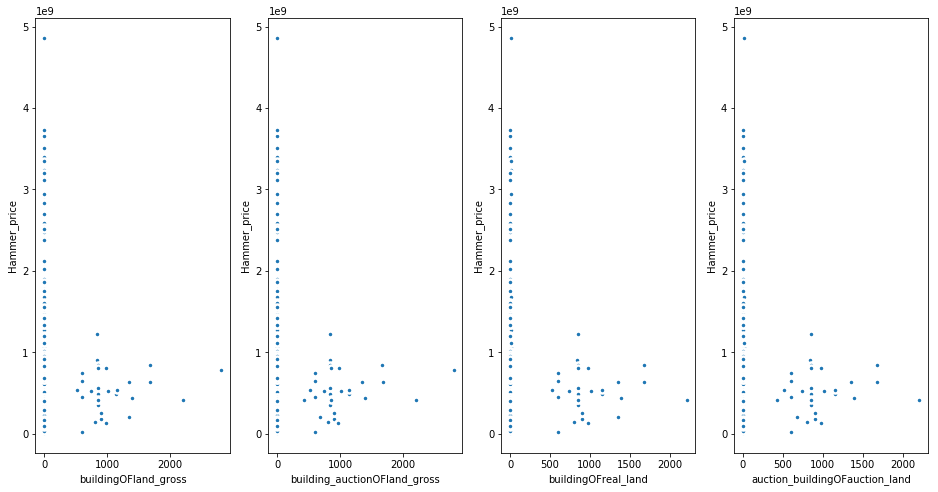

In [223]:
fig, axs = plt.subplots(ncols=4, figsize=(16, 8))
sns.scatterplot(x='buildingOFland_gross',y = 'Hammer_price' ,data=AM_train[AM_train.addr_do == 1], linewidth=2.5, ax=axs[0])
sns.scatterplot(x='building_auctionOFland_gross',y = 'Hammer_price',data=AM_train[AM_train.addr_do == 1], linewidth=2.5, ax=axs[1])
sns.scatterplot(x='buildingOFreal_land',y = 'Hammer_price',data=AM_train[AM_train.addr_do == 1], linewidth=2.5, ax=axs[2])
sns.scatterplot(x='auction_buildingOFauction_land',y = 'Hammer_price',data=AM_train[AM_train.addr_do == 1], linewidth=2.5, ax=axs[3])

In [224]:
AM_train.loc[AM_train.addr_do == 0][['buildingOFland_gross', 'building_auctionOFland_gross', 'buildingOFreal_land',
                                    'auction_buildingOFauction_land', 'Hammer_price']].corr()

,buildingOFland_gross,building_auctionOFland_gross,buildingOFreal_land,auction_buildingOFauction_land,Hammer_price
buildingOFland_gross,1.000000,1.000000,0.999819,0.999819,0.054676
building_auctionOFland_gross,1.000000,1.000000,0.999819,0.999819,0.054682
buildingOFreal_land,0.999819,0.999819,1.000000,1.000000,0.059603
auction_buildingOFauction_land,0.999819,0.999819,1.000000,1.000000,0.059644
Hammer_price,0.054676,0.054682,0.059603,0.059644,1.000000


In [225]:
AM_train.loc[AM_train.addr_do == 1][['buildingOFland_gross', 'building_auctionOFland_gross', 'buildingOFreal_land',
                                    'auction_buildingOFauction_land', 'Hammer_price']].corr()

,buildingOFland_gross,building_auctionOFland_gross,buildingOFreal_land,auction_buildingOFauction_land,Hammer_price
buildingOFland_gross,1.000000,0.993165,0.909757,0.902257,-0.015001
building_auctionOFland_gross,0.993165,1.000000,0.898338,0.905798,-0.012418
buildingOFreal_land,0.909757,0.898338,1.000000,0.991760,-0.020441
auction_buildingOFauction_land,0.902257,0.905798,0.991760,1.000000,-0.017749
Hammer_price,-0.015001,-0.012418,-0.020441,-0.017749,1.000000


In [226]:
def change_spec(x):
    if isinstance(x, str):
        return 1
    else:
        return 0

AM_train["bool_Specific"] = AM_train.Specific.apply(change_spec)

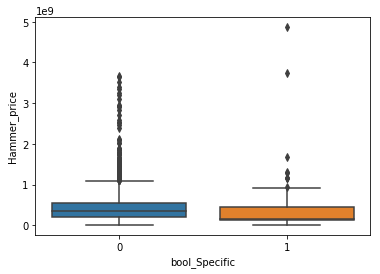

In [227]:
sns.boxplot(x = "bool_Specific", y = "Hammer_price", data = AM_train)

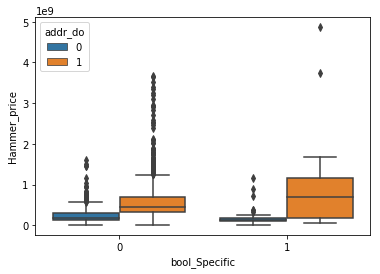

In [228]:
sns.boxplot(x = "bool_Specific", y = "Hammer_price", hue = 'addr_do', data = AM_train)

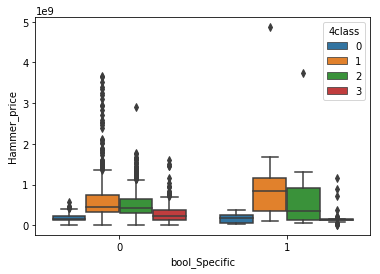

In [229]:
sns.boxplot(x = "bool_Specific", y = "Hammer_price", hue = '4class', data = AM_train)

# DATE : 감정일자,  최초경매일, 최종경매일, 보존등기일
# DATE : Appraisal_date, First_auction_date, Final_auction_date, Preserve_regist_date

In [253]:
AM_train['Diff_date'] = AM_train.First_auction_date - AM_train.Final_auction_date

In [254]:
DATE_list = ["Appraisal_date", "First_auction_date", "Final_auction_date", "Diff_date"]

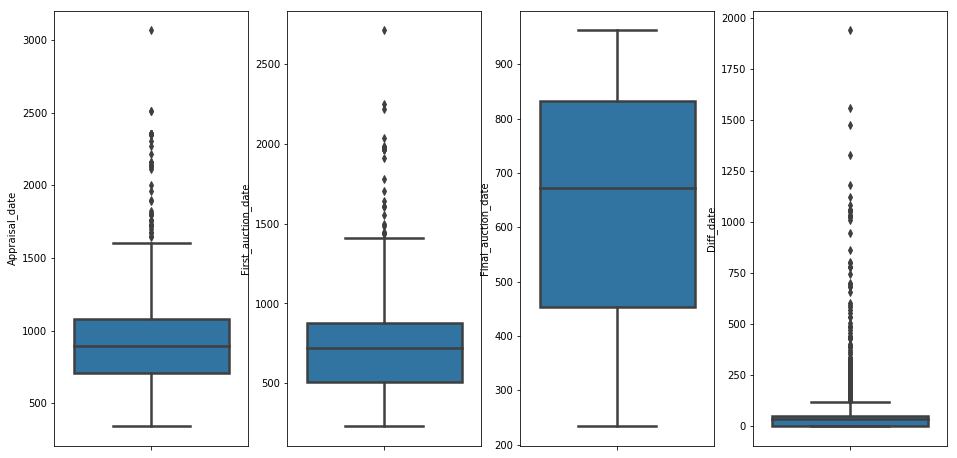

In [255]:
fig, axs = plt.subplots(ncols=4, figsize=(16, 8))
for i,j in enumerate(DATE_list):
    sns.boxplot(y=j,data=AM_train, linewidth=2.5, ax=axs[i])

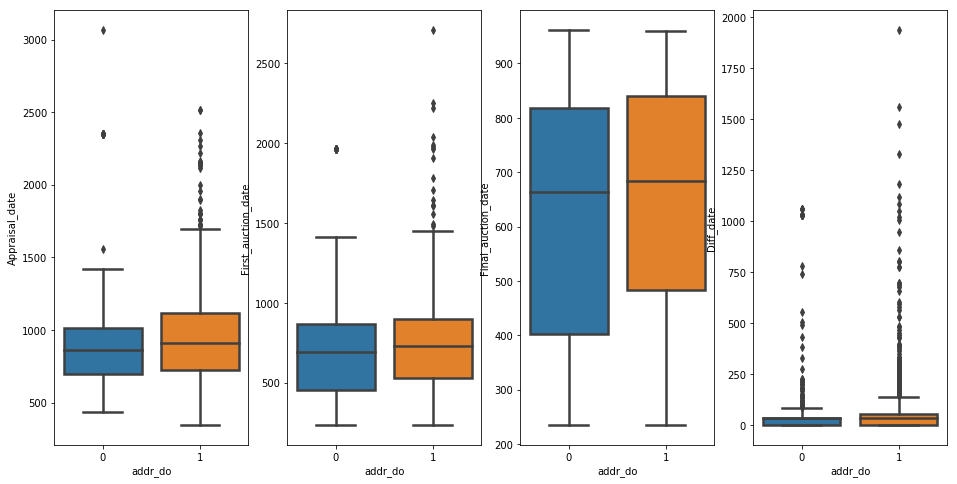

In [256]:
fig, axs = plt.subplots(ncols=4, figsize=(16, 8))
for i,j in enumerate(DATE_list):
    sns.boxplot(x="addr_do",y=j,data=AM_train, linewidth=2.5, ax=axs[i])

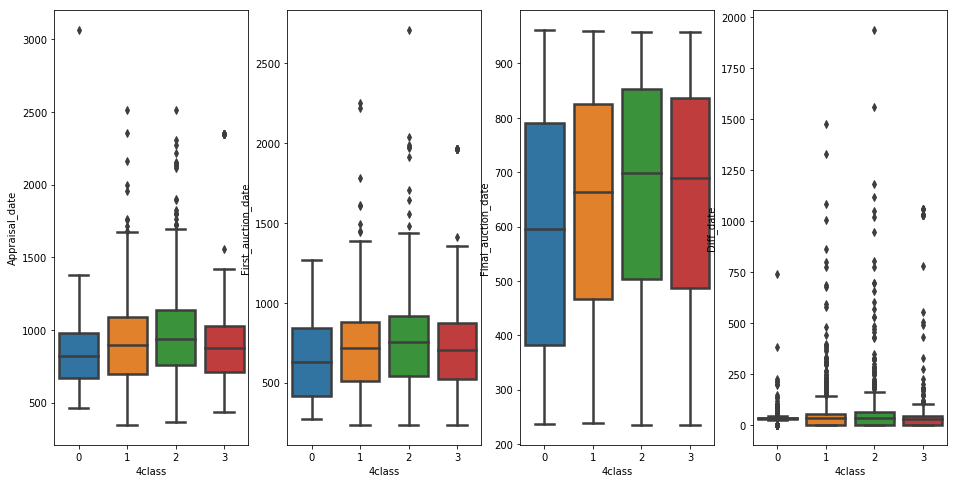

In [257]:
fig, axs = plt.subplots(ncols=4, figsize=(16, 8))
for i,j in enumerate(DATE_list):
    sns.boxplot(x="4class",y=j,data=AM_train, linewidth=2.5, ax=axs[i])

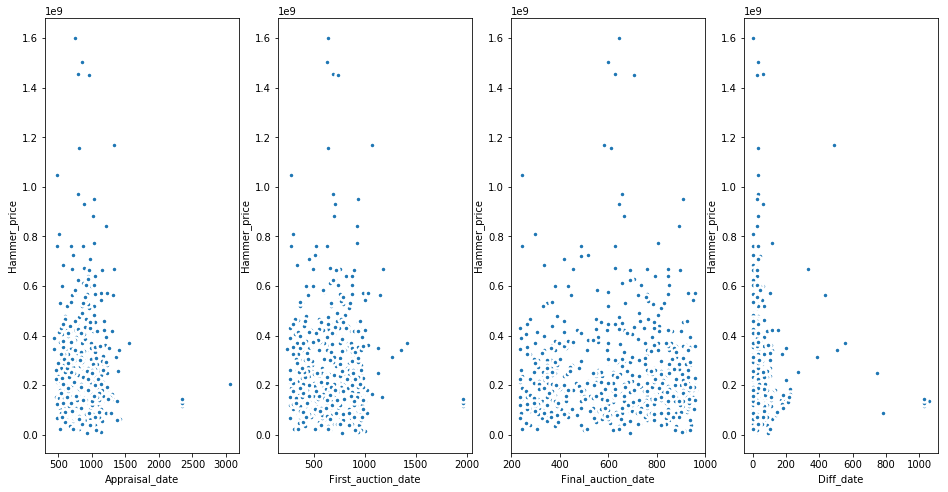

In [258]:
fig, axs = plt.subplots(ncols=4, figsize=(16, 8))
for i,j in enumerate(DATE_list):
    sns.scatterplot(x=j,y = 'Hammer_price' ,data=AM_train[AM_train.addr_do == 0], linewidth=2.5, ax=axs[i])

In [259]:
AM_train.loc[AM_train.addr_do == 0][["Appraisal_date", "First_auction_date", "Final_auction_date","Diff_price", "Hammer_price"]].corr()

,Appraisal_date,First_auction_date,Final_auction_date,Diff_price,Hammer_price
Appraisal_date,1.000000,0.922092,0.713896,0.140413,-0.046557
First_auction_date,0.922092,1.000000,0.838430,0.132659,-0.036450
Final_auction_date,0.713896,0.838430,1.000000,-0.064990,-0.000114
Diff_price,0.140413,0.132659,-0.064990,1.000000,0.589816
Hammer_price,-0.046557,-0.036450,-0.000114,0.589816,1.000000


In [260]:
AM_train.loc[AM_train.addr_do == 1][["Appraisal_date", "First_auction_date", "Final_auction_date","Diff_price", "Hammer_price"]].corr()

,Appraisal_date,First_auction_date,Final_auction_date,Diff_price,Hammer_price
Appraisal_date,1.000000,0.823233,0.730695,0.107361,-0.021851
First_auction_date,0.823233,1.000000,0.821450,0.164634,-0.016428
Final_auction_date,0.730695,0.821450,1.000000,0.081920,-0.017973
Diff_price,0.107361,0.164634,0.081920,1.000000,0.594244
Hammer_price,-0.021851,-0.016428,-0.017973,0.594244,1.000000
